In [1]:
from splmeter.signal import SoundPressure
from splmeter.processing.time import TimeWeight,VoltToSPL
from splmeter.processing.frequency import FrequencyWeight
from splmeter.measure.frequency import OneThirdOctave
from splmeter.visualizer import visualize_ops, plot_signal
import numpy as np
import soundfile as sf


c:\Users\Sumeet\Desktop\Projects\splmeter\splmeter\processing\time.py:80: RuntimeWarning:

divide by zero encountered in log10



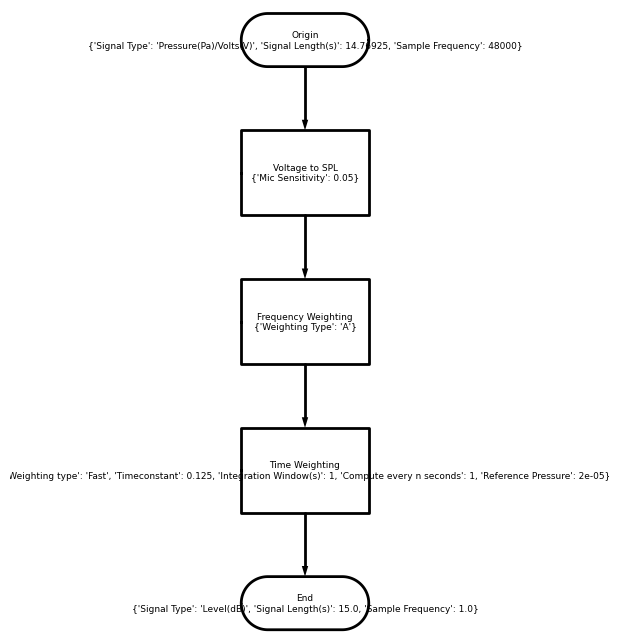

In [5]:
# Example 1 - Frequency weight - > Time weight

#get the signal array and sampling rate
wav_file = 'sample.wav'
sig,fs = sf.read(wav_file)

#Initialize the Sound pressures from the array
sig = SoundPressure().from_array(sig[:,0],fs)




#initialize the processing pipeline modules
v2s = VoltToSPL(mic_sensitivity=0.050)  # Volts to SPL module
tw = TimeWeight(integration_window=1,integration_time=1,type='Fast')  # Time weighting module
fw = FrequencyWeight(weighting_type='A') # Frequency weighting module


#process the signal sequentially
sig = v2s(sig) # convert volts to SPL
sig = fw(sig) # apply frequency weighting
sig = tw(sig)# apply time weighting



#Visualize resulting signal
visualize_ops(sig) # visualizes the complete processing signal went through
plot_signal(sig) # visualizes the resulting signal(SPL or dB levels)



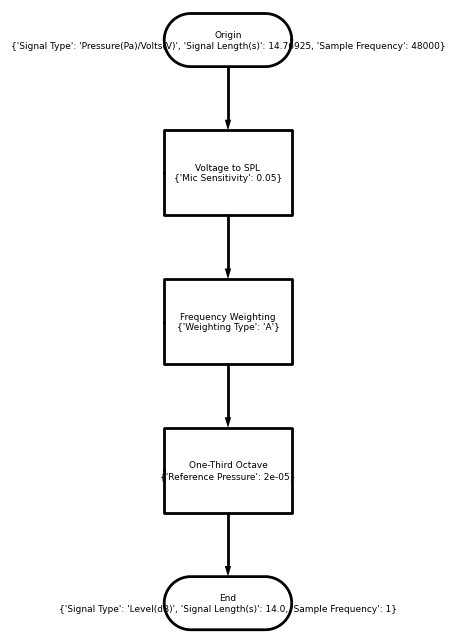

In [7]:
# Example 2 - Frequency weight - > One Third Octave

#get the signal array and sampling rate
wav_file = 'sample.wav'
sig,fs = sf.read(wav_file)

#Initialize the Sound pressures from the array
sig = SoundPressure().from_array(sig[:,0],fs)

#initialize the processing pipeline modules
v2s = VoltToSPL(mic_sensitivity=0.050)  # Volts to SPL module
oto = OneThirdOctave()  # One Third Octave module
fw = FrequencyWeight(weighting_type='A') # Frequency weighting module


#process the signal sequentially
sig = v2s(sig) # convert volts to SPL
sig = fw(sig) # apply frequency weighting
sig = oto(sig)# apply time weighting



#Visualize resulting signal
visualize_ops(sig) # visualizes the complete processing signal went through
plot_signal(sig) # visualizes the resulting signal(SPL or dB levels)
